In [1]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('downloads/homicide_by_countries.csv')
df.head() 

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [4]:
df.shape

(195, 6)

In [5]:
df.isnull().sum()
#df.dropna(inplace=true)

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [6]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [7]:
df


,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [77]:
df['Region'].replace({'Americas'},'N/S America', inplace = True)

In [9]:
df1 = df.sort_values('Count',ascending = False).reset_index(drop=True)
df1


,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22.5,47722,2020
1,Nigeria,Africa,Western Africa,22.0,44200,2019
2,India,Asia,Southern Asia,3.0,40651,2020
3,Mexico,N/S America,Central America,28.4,36579,2020
4,United States,N/S America,Northern America,6.5,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0.0,0,2015
191,Channel Islands,Europe,Northern Europe,0.0,0,2010
192,Saint Helena,Africa,Western Africa,0.0,0,2009
193,San Marino,Europe,Southern Europe,0.0,0,2011


In [10]:
df1= df[['Location','Count']].sort_values(by='Count', ascending=False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


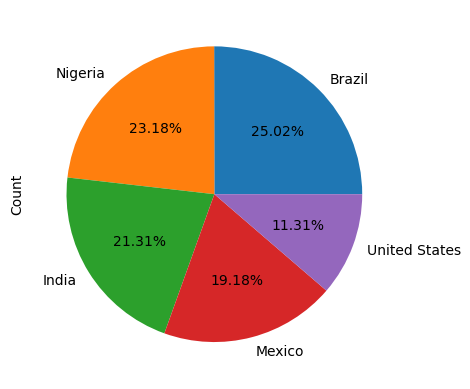

In [12]:
df1.plot(x='Location',y='Count',kind='pie',labels = df1.Location, autopct= '%1.2f%%')
plt.legend().set_visible(False)

In [13]:
df


,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [14]:
df2= df.groupby ('Region')['Count'].sum().sort_values(ascending=False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

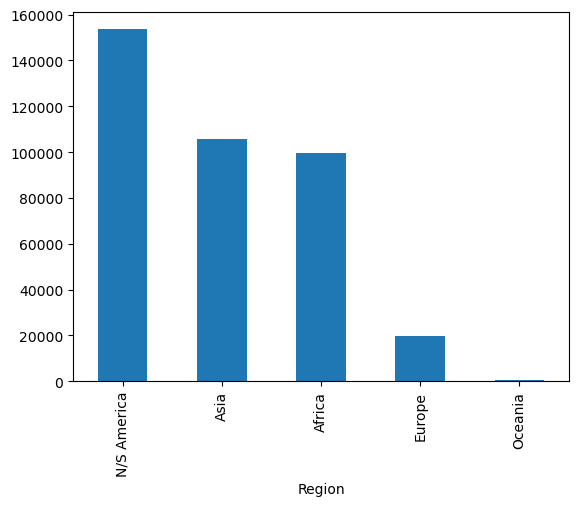

In [15]:
df2.plot(kind='bar')
plt.show

In [39]:
df


,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [65]:
df3 = df.groupby ('Subregion')['Count'].sum().sort_values(ascending= False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

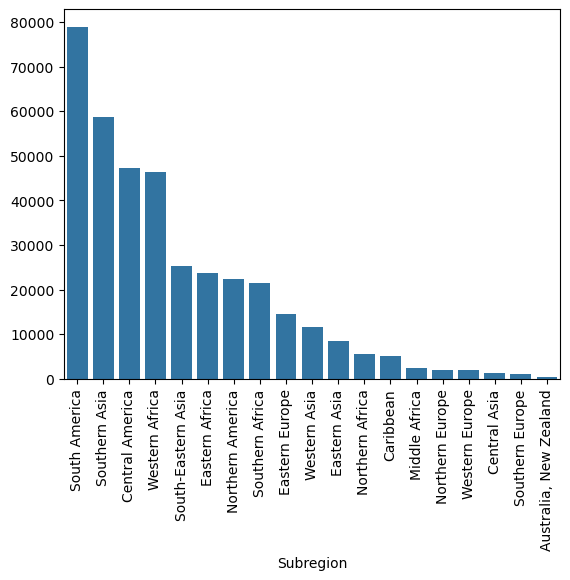

In [75]:
sns.barplot(x= df3.index, y=df3.values)
plt.xticks(rotation = 'vertical')
xlabel = None
